In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from logreg_train import describe_light, normalize_value, logreg

In [137]:
def computeCost(X, y, W, b, lam = 1):
    """
    X (ndarray (m,n): Data, m examples with n features
    y (ndarray (m,)): target values
    w (ndarray (n,)): model parameters
    b (scalar)      : model parameter
    lambda_ (scalar): Controls amount of regularization
    Returns:
      total_cost (scalar):  cost
    """
    m, n = X.shape
    cost = 0
    for i in range(m):
        z = np.dot(W, X.iloc[i].values) + b
        f_wb = 1 / (1 + np.exp(-z))
        cost += -y.iloc[i].item() * np.log(f_wb) - (1 - y.iloc[i].item())*np.log(1-f_wb)
    cost = cost / m
    reg_part = 0
    for i in range(n):
        reg_part += W[i]**2
    cost = cost + (lam / (2*m)) * reg_part
    return cost

In [138]:
def updateWb(X, y, w, b, lambda_, alpha):
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.0

    for i in range(m):
        z = np.dot(X.iloc[i].values, w) + b
        f_wb_i = 1 / (1 + np.exp(-z))
        err_i  = f_wb_i  - y.iloc[i].item()
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X.iloc[i,j].item()
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m
    dj_db = dj_db/m

    for j in range(n):
        dj_dw[j] = dj_dw[j] + (lambda_/m) * w[j]

    W_updated = w - alpha * dj_dw
    b_updated = b - alpha * dj_db
    return (W_updated, b_updated)

In [139]:
def executeGradientDescentAlgo(X, y, alpha, lambda_, nb_iter):
    m, n = X.shape
    w = np.zeros(n)
    b = 0.
    result = []
    for i in range(nb_iter):
        w, b = updateWb(X, y, w, b, lambda_, alpha)
        result.append(computeCost(X, y, w, b, lambda_))
    x = range(len(result))
    plt.plot(x, result, 'b')
    plt.xlabel("Algo iterations")
    plt.ylabel("Cost")
    plt.title("Evolution of the Cost with gradient descent iterations")
    plt.show()
    return(w, b)

In [140]:
train_df = pd.read_csv("../datasets/dataset_train.csv", index_col = "Index")

In [141]:
df_Ravenclaw = train_df.copy()


In [142]:
for i in range(len(df_Ravenclaw.columns)):
    df_Ravenclaw = df_Ravenclaw.loc[~df_Ravenclaw.isna()[df_Ravenclaw.columns[i]], :]
df_Ravenclaw


,Hogwarts House,First Name,Last Name,Birthday,Best Hand,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
Index,,,,,,,,,,,,,,,,,,
0,Ravenclaw,Tamara,Hsu,2000-03-30,Left,58384.0,-487.886086,5.727180,4.878861,4.722,272.035831,532.484226,5.231058,1039.788281,3.790369,0.715939,-232.79405,-26.89
1,Slytherin,Erich,Paredes,1999-10-14,Right,67239.0,-552.060507,-5.987446,5.520605,-5.612,-487.340557,367.760303,4.107170,1058.944592,7.248742,0.091674,-252.18425,-113.45
2,Ravenclaw,Stephany,Braun,1999-11-03,Left,23702.0,-366.076117,7.725017,3.660761,6.140,664.893521,602.585284,3.555579,1088.088348,8.728531,-0.515327,-227.34265,30.42
3,Gryffindor,Vesta,Mcmichael,2000-08-19,Left,32667.0,697.742809,-6.497214,-6.977428,4.026,-537.001128,523.982133,-4.809637,920.391449,0.821911,-0.014040,-256.84675,200.64
5,Slytherin,Corrine,Hammond,1999-04-04,Right,21209.0,-613.687160,-4.289197,6.136872,-6.592,-440.997704,396.201804,5.380286,1052.845164,11.751212,1.049894,-247.94549,-34.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,Gryffindor,Jung,Blank,2001-09-14,Right,49009.0,354.280086,-4.541837,-3.542801,5.702,-497.235066,618.220213,-5.231721,964.219853,3.389086,-0.649983,-250.39401,185.83
1596,Slytherin,Shelli,Lock,1998-03-12,Left,63296.0,367.531174,6.061064,-3.675312,1.757,-643.271092,445.827565,2.238112,1056.147366,5.825263,-0.333962,-246.42719,44.80
1597,Gryffindor,Benjamin,Christensen,1999-10-24,Right,63905.0,544.018925,-3.203269,-5.440189,6.065,-385.150457,635.211486,-5.984257,953.866685,1.709808,0.071569,-251.63679,198.47


In [143]:
df_RavenclawN = normalize_value(df_Ravenclaw)
df_RavenclawN

,Hogwarts House,First Name,Last Name,Birthday,Best Hand,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
Index,,,,,,,,,,,,,,,,,,
0,Ravenclaw,Tamara,Hsu,2000-03-30,Left,0.534948,-1.026164,0.869121,1.026164,0.367009,1.020932,0.339678,0.505583,0.225756,-0.699914,0.802518,1.198566,-0.511677
1,Slytherin,Erich,Paredes,1999-10-14,Right,1.065350,-1.149402,-1.374609,1.149402,-2.147745,-0.545465,-1.204590,0.253318,0.661470,0.415087,0.160441,-1.008153,-1.397510
2,Ravenclaw,Stephany,Braun,1999-11-03,Left,-1.542456,-0.792246,1.251771,0.792246,0.712076,1.831295,0.996868,0.129509,1.324351,0.892180,-0.463881,1.818968,0.074819
3,Gryffindor,Vesta,Mcmichael,2000-08-19,Left,-1.005465,1.250661,-1.472247,-1.250661,0.197639,-0.647902,0.259972,-1.748129,-2.489951,-1.656963,0.051710,-1.538773,1.816807
5,Slytherin,Corrine,Hammond,1999-04-04,Right,-1.691783,-1.267747,-1.049340,1.267747,-2.386225,-0.449871,-0.937954,0.539078,0.522737,1.866711,1.146002,-0.525757,-0.591500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,Gryffindor,Jung,Blank,2001-09-14,Right,-0.026602,0.591091,-1.097728,-0.591091,0.605490,-0.565874,1.143443,-1.842869,-1.493064,-0.829290,-0.602379,-0.804413,1.665245
1596,Slytherin,Shelli,Lock,1998-03-12,Left,0.829170,0.616538,0.933071,-0.616538,-0.354516,-0.867109,-0.472718,-0.166207,0.597847,-0.043851,-0.277341,-0.352965,0.221980
1597,Gryffindor,Benjamin,Christensen,1999-10-24,Right,0.865648,0.955457,-0.841349,-0.955457,0.693825,-0.334673,1.302735,-2.011781,-1.728549,-1.370699,0.139762,-0.945848,1.794600


In [144]:
df_RavenclawN.loc[df_Ravenclaw.loc[:,"Hogwarts House"] == "Ravenclaw", "Test Ravenclaw"] = 1
df_RavenclawN.loc[~(df_Ravenclaw.loc[:,"Hogwarts House"] == "Ravenclaw"), "Test Ravenclaw"] = 0
df_RavenclawN.drop([ col for col in train_df.columns if col not in ["Herbology", "Defense Against the Dark Arts", "Test Ravenclaw"]], axis=1, inplace=True)


In [145]:
X = df_RavenclawN.iloc[:, :-1]
y = df_RavenclawN.iloc[:, -1]

In [148]:
y

Index
0       1.0
1       0.0
2       1.0
3       0.0
5       0.0
       ... 
1595    0.0
1596    0.0
1597    0.0
1598    0.0
1599    0.0
Name: Test Ravenclaw, Length: 1251, dtype: float64

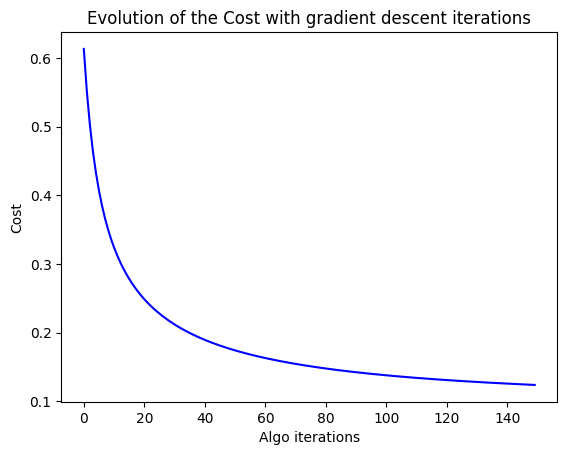

In [150]:
w_RavenclawReduit, b_RavenclawReduit = executeGradientDescentAlgo(X, y, 0.5, 0, 150)

In [166]:
def ft_mean(X):
    return sum(X) / len(X)

def plot_limit(X, y, id_paramX, id_paramY, w, b):
    m, n = X.shape
    trueVal = X.loc[y == 1, :]
    falseVal = X.loc[y == 0, :]
    w_paramY = w[id_paramY]
    w_paramX = w[id_paramX]
    x_graph = np.linspace(-2, 2, 30)
    const = b
    for i in range(n):
        if (i != id_paramX and i != id_paramY):
            const += w[i] * ft_mean(X.iloc[i].values)
    const = const / w_paramY
    y_graph = -(w_paramX/w_paramY) * x_graph - const

    plt.plot(trueVal.iloc[:,id_paramX], trueVal.iloc[:,id_paramY], '+',  label="YES", color="b")
    plt.plot(falseVal.iloc[:,id_paramX], falseVal.iloc[:,id_paramY], '+',  label="NO", color="black")
    plt.plot(x_graph, y_graph, 'r', label="Limit")

    plt.xlabel(trueVal.columns[id_paramX])
    plt.ylabel(trueVal.columns[id_paramY])
    plt.show()

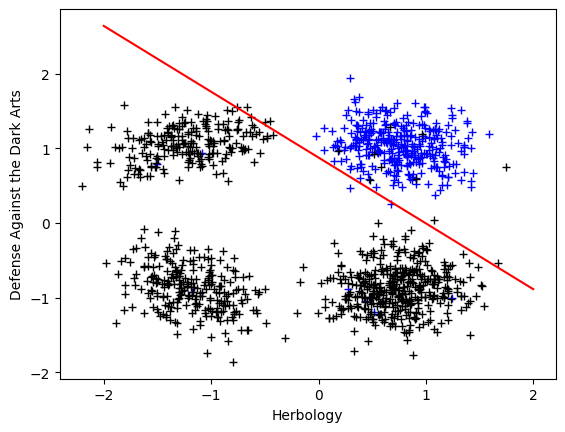

In [167]:
plot_limit(X, y, 0, 1, w_RavenclawReduit, b_RavenclawReduit)